In [1]:
import pandas as pd

In [2]:
file=pd.read_csv(r'D:\clean R4\file_cleaned.csv')

In [3]:
file.head()

,id,date,user,pc,filename,content
0,L9G8-J9QE34VM-2834VDPB,2010-01-02 07:23:14,MOH0273,PC-6699,EYPC9Y08.doc,D0-CF-11-E0-A1-B1-1A-E1 during difficulty over...
1,H0W6-L4FG38XG-9897XTEN,2010-01-02 07:26:19,MOH0273,PC-6699,N3LTSU3O.pdf,25-50-44-46-2D carpenters 25 landed strait dis...
2,M3Z0-O2KK89OX-5716MBIM,2010-01-02 08:12:03,HPH0075,PC-2417,D3D3WC9W.doc,D0-CF-11-E0-A1-B1-1A-E1 union 24 declined impo...
3,E1I4-S4QS61TG-3652YHKR,2010-01-02 08:17:00,HPH0075,PC-2417,QCSW62YS.doc,D0-CF-11-E0-A1-B1-1A-E1 becoming period begin ...
4,D4R7-E7JL45UX-0067XALT,2010-01-02 08:24:57,HSB0196,PC-8001,AU75JV6U.jpg,FF-D8


In [4]:
file['extension']=file['filename'].str.split('.').str[-1]

In [5]:
sensitive_keywords = ['confidential', 'private', 'secret', 'sensitive', 'restricted', 'classified', 'amount', 'amounts', 'amounted', 'amounting', 'total', 'totals', 'totaled', 'totaling']


In [6]:
file['sensitive']=file['content'].str.lower().str.contains('|'.join(sensitive_keywords), case=False, na=False).astype(int)

In [7]:
file_agg = file.groupby('user').agg(
    total_files=('filename', 'count'),
    unique_pcs=('filename', 'nunique'),
    sensitive_files=('sensitive','sum'),
    avg_file_length=('content',lambda x:x.str.len().median())).reset_index()

In [8]:
ext_agg = file.groupby(['user', 'extension']).size().reset_index(name='count')
top_ext = ext_agg.sort_values(['user', 'count'], ascending=[True, False]).groupby('user').first().reset_index()
file_agg['top_file_extension'] = top_ext['extension']

In [9]:
pc_agg= file.groupby('pc').agg(
    total_files=('id', 'count'),
    unique_users=('user', 'nunique')).reset_index()

In [10]:
file_agg.to_csv(r'D:\clean R4\user_agg.csv', index=False)
pc_agg.to_csv(r'D:\clean R4\pc_agg.csv', index=False)

In [11]:
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


In [12]:
file_agg=pd.read_csv(r'D:\clean R4\user_agg.csv')

In [13]:
file_agg.head(20)

,user,total_files,unique_pcs,sensitive_files,avg_file_length,top_file_extension
0,AAF0535,357,357,29,351.0,doc
1,AAM0658,31,31,9,390.0,doc
2,ABC0174,589,589,40,374.0,doc
3,AHD0848,199,199,19,377.0,doc
4,AHM0410,2198,2198,291,372.0,doc
5,AIB0948,1669,1669,141,374.0,doc
6,AIP0982,6182,6182,626,365.5,doc
7,AJD0074,515,515,44,367.0,doc
8,AJF0370,11053,11053,1236,381.0,doc
9,AJH0175,236,236,15,381.0,doc


In [14]:
file_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user                264 non-null    object 
 1   total_files         264 non-null    int64  
 2   unique_pcs          264 non-null    int64  
 3   sensitive_files     264 non-null    int64  
 4   avg_file_length     264 non-null    float64
 5   top_file_extension  264 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 12.5+ KB


In [15]:
pc_agg.head()

,pc,total_files,unique_users
0,PC-0004,24,6
1,PC-0008,981,2
2,PC-0039,16,2
3,PC-0044,20,3
4,PC-0072,18,3


In [16]:
top_users= file_agg.nlargest(10, 'sensitive_files')

C:\Users\HP\AppData\Local\Temp\ipykernel_4224\2370453488.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_users, x='user', y='sensitive_files', palette='viridis')


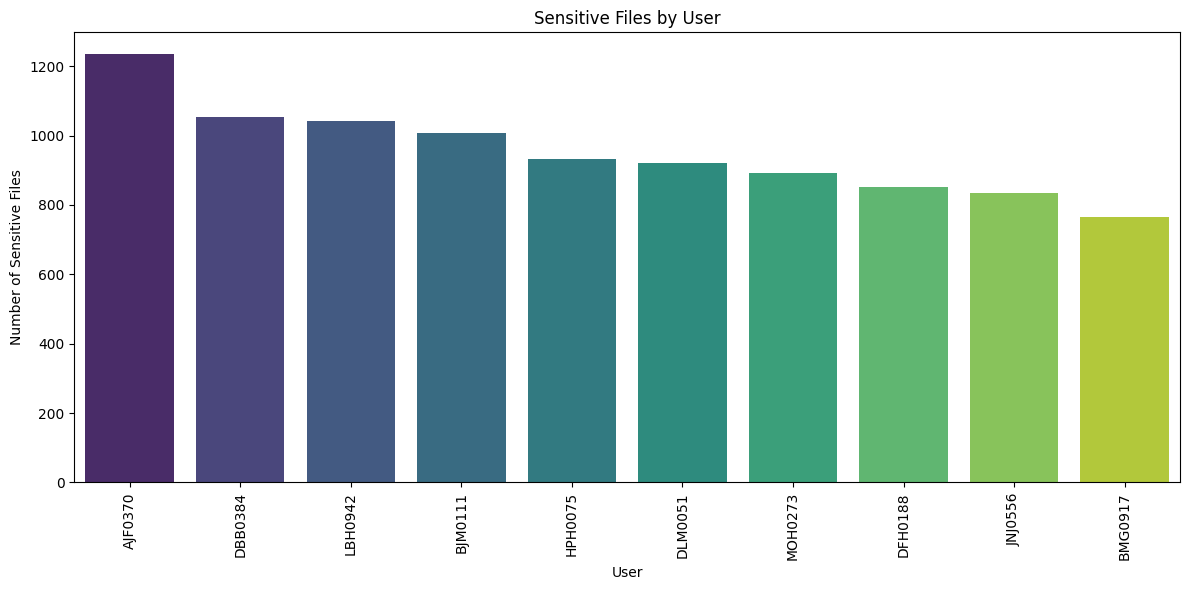

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_users, x='user', y='sensitive_files', palette='viridis')
plt.xticks(rotation=90)
plt.title('Sensitive Files by User')
plt.xlabel('User')
plt.ylabel('Number of Sensitive Files')
plt.tight_layout()
plt.show()  

In [18]:
user='AJF0370'
user_rows= file[file['user'] == user]
user_rows.head(20)

,id,date,user,pc,filename,content,extension,sensitive
331,N7F0-C6VA24SF-3231NGCY,2010-01-04 06:26:14,AJF0370,PC-7275,4O51XXEZ.doc,D0-CF-11-E0-A1-B1-1A-E1 occasionally striking ...,doc,0
350,G6T5-S6JZ01FQ-7252MWRJ,2010-01-04 07:52:52,AJF0370,PC-6956,8WLN37R4.doc,D0-CF-11-E0-A1-B1-1A-E1 eccles trees purkinje ...,doc,0
351,H2U0-B7IG33VJ-8098VABO,2010-01-04 07:53:34,AJF0370,PC-6956,DC9Y4N47.doc,D0-CF-11-E0-A1-B1-1A-E1 flexibility broad peop...,doc,0
352,H0V2-K2DK38UN-9620ATTE,2010-01-04 07:53:49,AJF0370,PC-6956,T5WROA1U.pdf,25-50-44-46-2D geometry motivated winding wide...,pdf,1
353,U5T2-V2DP06EF-2137WHYD,2010-01-04 07:54:04,AJF0370,PC-6956,ROH8I55B.pdf,25-50-44-46-2D an microcompartment tightly mm ...,pdf,0
354,R9M7-Z6LC57PX-3159YLIS,2010-01-04 07:54:24,AJF0370,PC-6956,2G5SIZGK.doc,D0-CF-11-E0-A1-B1-1A-E1 researchers decades ce...,doc,0
463,M2F2-O9XX99HK-0952MYOU,2010-01-04 09:12:43,AJF0370,PC-8651,Y9X1LKLQ.doc,D0-CF-11-E0-A1-B1-1A-E1 guinea sport increasin...,doc,0
464,I4X4-N2IU29SO-8905GNBL,2010-01-04 09:12:45,AJF0370,PC-8651,60D0TVS7.pdf,25-50-44-46-2D tom 148 per one offended master...,pdf,0
477,E7S9-W4HK77OK-2549XQVM,2010-01-04 09:15:18,AJF0370,PC-8651,JEHWHY4U.pdf,25-50-44-46-2D criticism 274 considering gil t...,pdf,0
484,W1P0-N1DF26XZ-9870IOEI,2010-01-04 09:16:20,AJF0370,PC-8651,BX9SFXR1.txt,4C-51-4F-43 beverly an awarded nine few report...,txt,0


In [19]:
pc_agg=pd.read_csv(r'D:\clean R4\pc_agg.csv')

In [ ]:
high_activity_pcs=pc_agg.sort_values(by='total_files', ascending=False).head(10) #pcs usually used by users with high activity indicate risky behavior
shared_pcs=pc_agg.sort_values(by='unique_users', ascending=False).head(10) #possibility of multiple users access sensitive files from same PC
pc_agg['file_per_user'] = pc_agg['total_files'] / pc_agg['unique_users'] 
top_ratio_pcs=pc_agg.sort_values(by='file_per_user', ascending=False).head(10)

## one users dominates file activity on that pc- cloud be suspicious

C:\Users\HP\AppData\Local\Temp\ipykernel_4224\3504376886.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=high_activity_pcs, x='pc', y='total_files', palette='Blues_r')


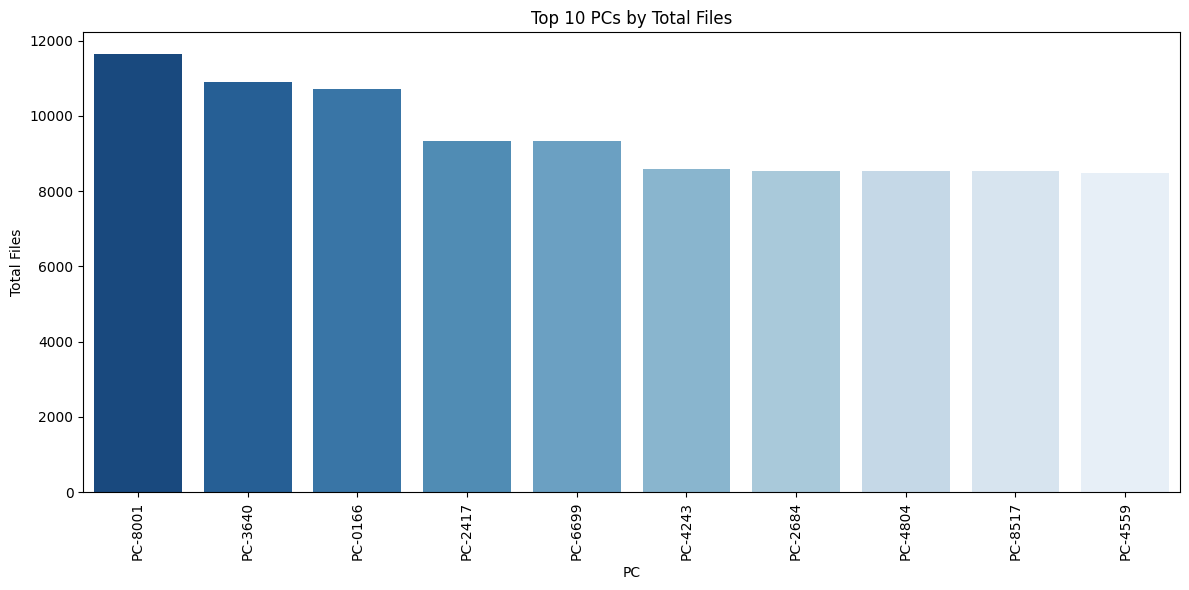

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=high_activity_pcs, x='pc', y='total_files', palette='Blues_r')
plt.xticks(rotation=90)
plt.title('Top 10 PCs by Total Files')
plt.xlabel('PC')
plt.ylabel('Total Files')
plt.tight_layout()
plt.show()

In [23]:
pc='PC-8001'
pc_rows= file[file['pc'] == pc]
pc_rows.head(20)

,id,date,user,pc,filename,content,extension,sensitive
4,D4R7-E7JL45UX-0067XALT,2010-01-02 08:24:57,HSB0196,PC-8001,AU75JV6U.jpg,FF-D8,jpg,0
17,G0W7-P9ZX61JF-3284AONZ,2010-01-02 08:32:54,HSB0196,PC-8001,EKF5WGJ8.doc,D0-CF-11-E0-A1-B1-1A-E1 protect accidents sigh...,doc,0
21,A6G0-Q1QA44MM-5963SWJR,2010-01-02 08:36:52,HSB0196,PC-8001,7POS4KY2.doc,D0-CF-11-E0-A1-B1-1A-E1 degree both left playe...,doc,0
35,L3S7-C8TZ87ZS-4804FLTA,2010-01-02 09:48:16,HSB0196,PC-8001,OIDKEAQQ.doc,D0-CF-11-E0-A1-B1-1A-E1 prince prince prince a...,doc,0
36,Q6S2-F3YI35AD-4917KRZO,2010-01-02 09:48:23,HSB0196,PC-8001,H4TW0GOU.doc,D0-CF-11-E0-A1-B1-1A-E1 prince prince prince p...,doc,0
37,F4C7-X1HW55XP-5693KFWA,2010-01-02 09:48:27,HSB0196,PC-8001,52G2H8B2.doc,D0-CF-11-E0-A1-B1-1A-E1 prince prince prince p...,doc,0
38,A9R7-E8SK40KZ-8970AEDG,2010-01-02 09:48:29,HSB0196,PC-8001,4OFNLN94.zip,50-4B-03-04-14 ahmose prince ahmose prince pri...,zip,0
39,K3V4-E0XW36HA-3405OSIX,2010-01-02 09:49:03,HSB0196,PC-8001,T4V7DFJ7.pdf,25-50-44-46-2D prince prince prince ahmose pri...,pdf,0
40,V8G8-F1JE53MH-9305REPD,2010-01-02 09:49:05,HSB0196,PC-8001,IXUOKKJ3.doc,D0-CF-11-E0-A1-B1-1A-E1 prince prince prince p...,doc,0
41,Y9P6-F4AE69OE-4489JOFS,2010-01-02 09:49:27,HSB0196,PC-8001,1FPLTM6V.doc,D0-CF-11-E0-A1-B1-1A-E1 ahmose prince prince p...,doc,0
